In [238]:
# libraries for Data Manipulation
import pandas as pd
import numpy as np

# libraies for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for Machine Learning
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [239]:
# !conda install -c conda-forge catboost -y
# !conda install -c conda-forge xgboost -y




In [240]:
df = pd.read_csv('data/cleaned_data_science_jobs.csv')

In [241]:

df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [242]:
# Printing the total number of rows (values) and columns (features) in the dataframe
print(f'There are {df.shape[0]} rows or values.')
print(f'There are {df.shape[1]} columns or features.')
print('*************************************')

# Separating categorical and numerical columns using select_dtypes() method
# 'object' data type is generally used for categorical columns
cat = df.select_dtypes(include = ['object'])
# Excluding 'object' data type to get numerical columns
num = df.select_dtypes(exclude = ['object'])

# Printing the number of categorical columns and their names
print(f'There are {len(cat.columns)} Categorical Columns')
print('--------------------------------------')
# Using 'enumerate' to have an automatic counter (starts from 1 in this case)
for i, col_name in enumerate(cat.columns, 1):
    print(f'{i}. {col_name}')
print('\n***************************************\n')

# Printing the number of numerical columns and their names
print(f'There are {len(num.columns)} Numerical Columns')
print('--------------------------------------')
# Using 'enumerate' to have an automatic counter (starts from 1 in this case)
for i, col_name in enumerate(num.columns, 1):
    print(f'{i}. {col_name}')


There are 565 rows or values.
There are 10 columns or features.
*************************************
There are 7 Categorical Columns
--------------------------------------
1. experience_level
2. employment_type
3. job_title
4. employee_residence
5. remote_ratio
6. company_location
7. company_size

***************************************

There are 3 Numerical Columns
--------------------------------------
1. work_year
2. salary_in_usd
3. salary_in_k_usd


In [243]:
num

,work_year,salary_in_usd,salary_in_k_usd
0,2020,79833,79.833
1,2020,260000,260.000
2,2020,109024,109.024
3,2020,20000,20.000
4,2020,150000,150.000
...,...,...,...
560,2022,154000,154.000
561,2022,126000,126.000
562,2022,129000,129.000
563,2022,150000,150.000


In [244]:
cat

,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,Intermediate,Full Time,Data Scientist,Germany,On Site,Germany,Large
1,Senior,Full Time,Machine Learning Scientist,Japan,On Site,Japan,Small
2,Senior,Full Time,Data Engineer,United Kingdom (Great Britain),Partially Remote,United Kingdom (Great Britain),Medium
3,Intermediate,Full Time,Data Analytics Manager,Honduras,On Site,Honduras,Small
4,Senior,Full Time,Machine Learning Engineer,United States of America,Partially Remote,United States of America,Large
...,...,...,...,...,...,...,...
560,Senior,Full Time,Data Engineer,United States of America,Fully Remote,United States of America,Medium
561,Senior,Full Time,Data Engineer,United States of America,Fully Remote,United States of America,Medium
562,Senior,Full Time,Data Analyst,United States of America,On Site,United States of America,Medium
563,Senior,Full Time,Data Analyst,United States of America,Fully Remote,United States of America,Medium


Let's visualize the relationships of these variables

First, job title with respect to salary

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Data Scientist'),
  Text(1, 0, 'Machine Learning Scientist'),
  Text(2, 0, 'Data Engineer'),
  Text(3, 0, 'Data Analytics Manager'),
  Text(4, 0, 'Machine Learning Engineer'),
  Text(5, 0, 'Data Analyst'),
  Text(6, 0, 'Data Science Manager'),
  Text(7, 0, 'Research Scientist'),
  Text(8, 0, 'ML Manager'),
  Text(9, 0, 'Data Engineering Manager'),
  Text(10, 0, 'AI Scientist'),
  Text(11, 0, 'Computer Vision Engineer'),
  Text(12, 0, 'Data Architect'),
  Text(13, 0, 'NLP Engineer')])

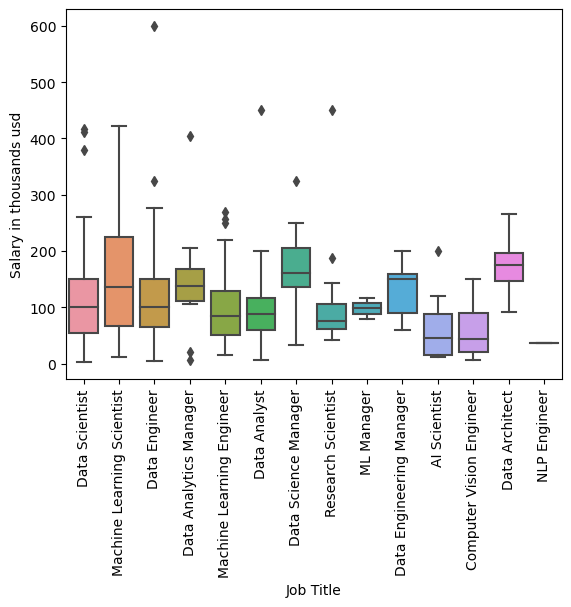

In [245]:
sns.boxplot(x=df['job_title'], y=df['salary_in_k_usd'])
plt.xlabel("Job Title")
plt.ylabel("Salary in thousands usd")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Data Scientist'),
  Text(1, 0, 'Machine Learning Scientist'),
  Text(2, 0, 'Data Engineer'),
  Text(3, 0, 'Data Analytics Manager'),
  Text(4, 0, 'Machine Learning Engineer'),
  Text(5, 0, 'Data Analyst'),
  Text(6, 0, 'Data Science Manager'),
  Text(7, 0, 'Research Scientist'),
  Text(8, 0, 'ML Manager'),
  Text(9, 0, 'Data Engineering Manager'),
  Text(10, 0, 'AI Scientist'),
  Text(11, 0, 'Computer Vision Engineer'),
  Text(12, 0, 'Data Architect'),
  Text(13, 0, 'NLP Engineer')])

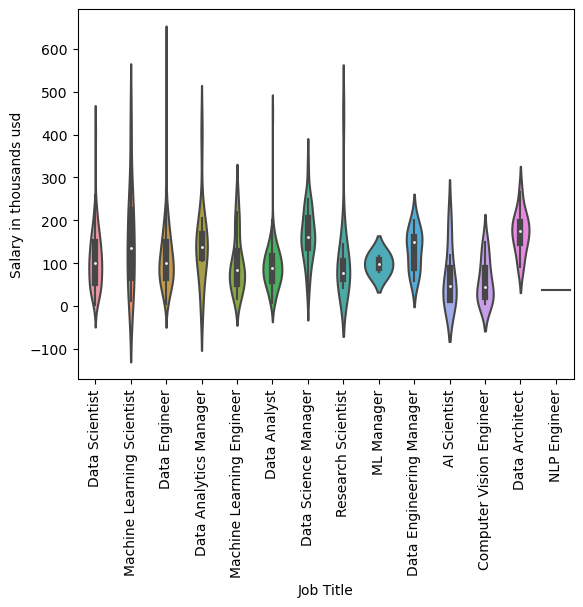

In [246]:
sns.violinplot(x=df['job_title'], y=df['salary_in_k_usd'])
plt.xlabel("Job Title")
plt.ylabel("Salary in thousands usd")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Data Scientist'),
  Text(1, 0, 'Machine Learning Scientist'),
  Text(2, 0, 'Data Engineer'),
  Text(3, 0, 'Data Analytics Manager'),
  Text(4, 0, 'Machine Learning Engineer'),
  Text(5, 0, 'Data Analyst'),
  Text(6, 0, 'Data Science Manager'),
  Text(7, 0, 'Research Scientist'),
  Text(8, 0, 'ML Manager'),
  Text(9, 0, 'Data Engineering Manager'),
  Text(10, 0, 'AI Scientist'),
  Text(11, 0, 'Computer Vision Engineer'),
  Text(12, 0, 'Data Architect'),
  Text(13, 0, 'NLP Engineer')])

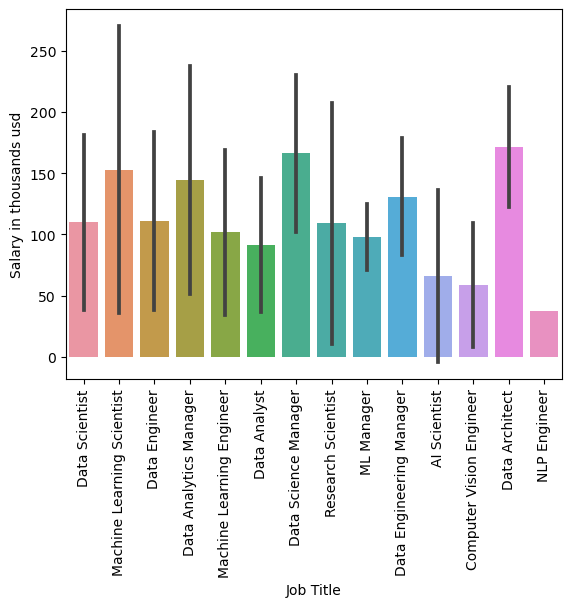

In [247]:
sns.barplot(x=df['job_title'], y=df['salary_in_k_usd'], ci="sd")  # ci="sd" adds error bars for standard deviation
plt.xlabel("Job Title")
plt.ylabel("Salary in thousands usd")
plt.xticks(rotation=90)

In [248]:
X = df.drop(columns=['salary_in_usd', 'salary_in_k_usd','employee_residence', 'remote_ratio' ])
# X = df.drop(columns=['salary_in_usd', 'salary_in_k_usd', 'employee_residence', 'remote_ratio', 'work_year', 'employment_type', 'company_size', 'company_location', 'experience_level' ])

In [249]:
X

,work_year,experience_level,employment_type,job_title,company_location,company_size
0,2020,Intermediate,Full Time,Data Scientist,Germany,Large
1,2020,Senior,Full Time,Machine Learning Scientist,Japan,Small
2,2020,Senior,Full Time,Data Engineer,United Kingdom (Great Britain),Medium
3,2020,Intermediate,Full Time,Data Analytics Manager,Honduras,Small
4,2020,Senior,Full Time,Machine Learning Engineer,United States of America,Large
...,...,...,...,...,...,...
560,2022,Senior,Full Time,Data Engineer,United States of America,Medium
561,2022,Senior,Full Time,Data Engineer,United States of America,Medium
562,2022,Senior,Full Time,Data Analyst,United States of America,Medium
563,2022,Senior,Full Time,Data Analyst,United States of America,Medium


In [250]:
y = df['salary_in_k_usd']

In [251]:
y

0       79.833
1      260.000
2      109.024
3       20.000
4      150.000
        ...   
560    154.000
561    126.000
562    129.000
563    150.000
564    200.000
Name: salary_in_k_usd, Length: 565, dtype: float64

Create column transformers

In [253]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", OneHotEncoder(), cat_features),
        ("StandardScaler", StandardScaler(), num_features)
    ]
)

In [254]:
X = preprocessor.fit_transform(X)

In [255]:
X.shape

(565, 76)

In [268]:
dense_X = X.toarray()
dense_X

array([[ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        , -1.95636136],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        , -1.95636136],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        , -1.95636136],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.91093869],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.91093869],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.91093869]])

In [271]:
# Assuming you've named your transformers "OneHotEncoder" and "StandardScaler"
ohe_feature_names = preprocessor.named_transformers_['OneHotEncoder'].get_feature_names_out(cat_features)
all_feature_names = np.concatenate([ohe_feature_names, num_features])
all_feature_names

array(['experience_level_Executive', 'experience_level_Intermediate',
       'experience_level_Junior', 'experience_level_Senior',
       'employment_type_Contract', 'employment_type_Freelance',
       'employment_type_Full Time', 'employment_type_Part Time',
       'job_title_AI Scientist', 'job_title_Computer Vision Engineer',
       'job_title_Data Analyst', 'job_title_Data Analytics Manager',
       'job_title_Data Architect', 'job_title_Data Engineer',
       'job_title_Data Engineering Manager',
       'job_title_Data Science Manager', 'job_title_Data Scientist',
       'job_title_ML Manager', 'job_title_Machine Learning Engineer',
       'job_title_Machine Learning Scientist', 'job_title_NLP Engineer',
       'job_title_Research Scientist', 'company_location_Algeria',
       'company_location_American Samoa', 'company_location_Australia',
       'company_location_Austria', 'company_location_Belgium',
       'company_location_Brazil', 'company_location_Canada',
       'company_lo

In [273]:
df_transformed = pd.DataFrame(dense_X, columns=all_feature_names)
df_transformed


,experience_level_Executive,experience_level_Intermediate,experience_level_Junior,experience_level_Senior,employment_type_Contract,employment_type_Freelance,employment_type_Full Time,employment_type_Part Time,job_title_AI Scientist,job_title_Computer Vision Engineer,...,company_location_Turkey,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom (Great Britain),company_location_United States of America,company_location_Viet Nam,company_size_Large,company_size_Medium,company_size_Small,work_year
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.956361
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.956361
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.956361
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.956361
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.956361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.910939
561,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.910939
562,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.910939
563,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.910939


Split df into train and test

In [256]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [257]:
X_train.shape, X_test.shape

((452, 76), (113, 76))

In [258]:
y_train.shape, y_test.shape

((452,), (113,))

Evaluation function

In [259]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted),
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

Models

In [278]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate train and test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print('Model performance for training set')
    print("- Root Mean Squared Error: {: .4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {: .4f}".format(model_train_mae))
    print("- R2 Score {: .4f}".format(model_train_r2))

    if model == "LinearRegression":
        coefficients = pd.DataFrame({
        'Feature': all_feature_names,
        'Coefficient': model.coef_
        })

    print(coefficients)

    print('-----------------------------------------------------------------')

    print('Model performance for test set')
    print("- Root Mean Squared Error: {: .4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {: .4f}".format(model_test_mae))
    print("- R2 Score {: .4f}".format(model_test_r2))


    print('='*35)
    print('\n')


LinearRegression
Model performance for training set
- Root Mean Squared Error:  51.9067
- Mean Absolute Error:  32.9035
- R2 Score  0.5202
                          Feature  Coefficient
0      experience_level_Executive    66.243590
1   experience_level_Intermediate   -26.396161
2         experience_level_Junior   -42.545788
3         experience_level_Senior     2.698360
4        employment_type_Contract    35.173662
..                            ...          ...
71      company_location_Viet Nam     0.000000
72             company_size_Large    12.698742
73            company_size_Medium     3.567032
74             company_size_Small   -16.265774
75                      work_year    -1.652186

[76 rows x 2 columns]
-----------------------------------------------------------------
Model performance for test set
- Root Mean Squared Error:  39.3709
- Mean Absolute Error:  29.3398
- R2 Score  0.5403


Lasso
Model performance for training set
- Root Mean Squared Error:  56.2812
- Mean Abso

In [261]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
2,Ridge,0.551447
0,LinearRegression,0.540346
7,CatBoosting Regressor,0.483150
1,Lasso,0.469835
6,XGBRegressor,0.416304
5,Random Forest Regressor,0.347119
3,K-Neighbors Regressor,0.241123
8,AdaBoost Regressor,0.157186
4,Decision Tree,0.012902


In [262]:
ridge_model = Ridge(fit_intercept=True)
ridge_model = ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print("Accuracy of Model is %.2f" %score)

Accuracy of Model is 55.14


Text(0, 0.5, 'Predicted')

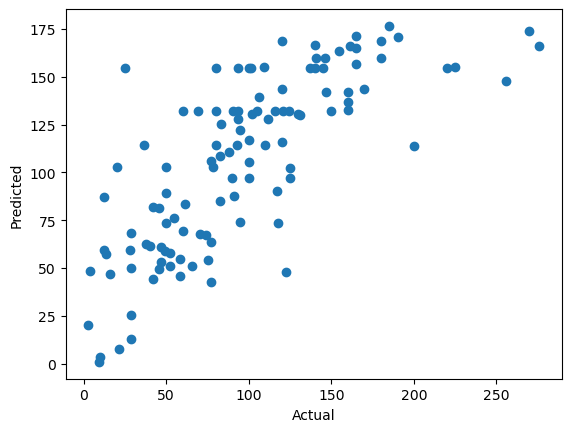

In [263]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='salary_in_k_usd'>

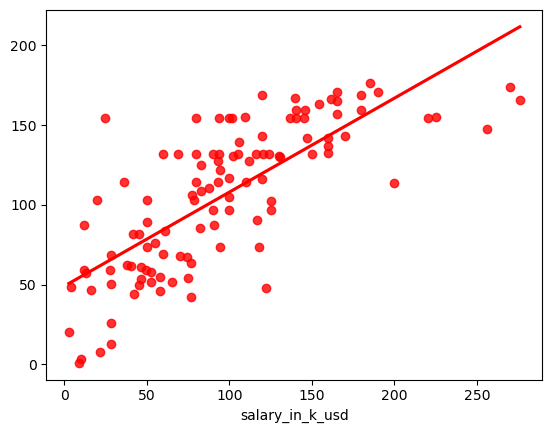

In [264]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

In [265]:
pred_df = pd.DataFrame({'Actual Salary': y_test, 'Predicted salary': y_pred, 'Difference': y_test-y_pred})
pred_df


,Actual Salary,Predicted salary,Difference
35,74.130,67.270445,6.859555
114,45.391,49.467097,-4.076097
172,60.000,69.252519,-9.252519
236,46.809,53.294306,-6.485306
289,120.600,131.960816,-11.360816
...,...,...,...
252,28.399,12.776432,15.622568
218,140.000,166.773983,-26.773983
153,13.400,57.512544,-44.112544
345,161.342,166.248095,-4.906095
